## Practice
1. Input simple textures from image files.
2. Use cv2.getPerspectiveTransform() to get Homography Matrix by specifing 4 pairs of corresponding points.
3. Use cv2.warpPerspective() to get projective views of the textures.
4. Use cv2.add() to combine the projective textures to make a 3D room.
5. Upload your Jupyter code file (*.ipynb)

In [123]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

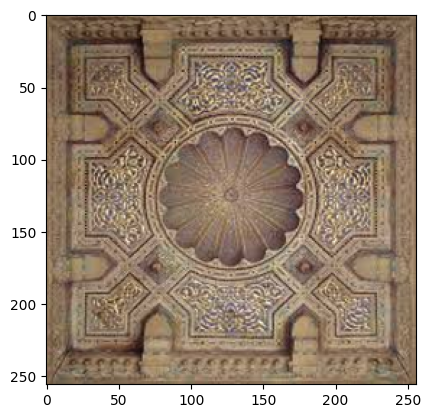

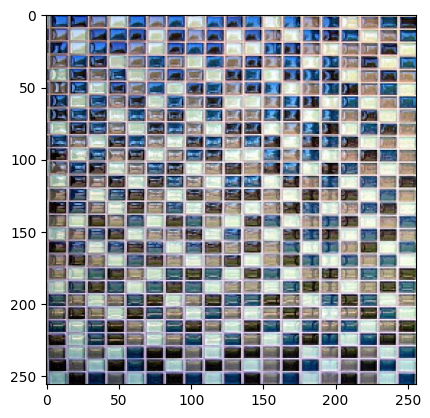

In [124]:
# Load the images and resize them
img1 = cv2.imread('tile_texture7.jpg')
img2 = cv2.imread('tile_texture9.jpg')
img1 = cv2.resize(img1, (256, 256), interpolation=cv2.INTER_CUBIC)
img2 = cv2.resize(img2, (256, 256), interpolation=cv2.INTER_CUBIC)
rows, cols = img2.shape[:2]
cell_rows, cell_cols = img1.shape[:2]

plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

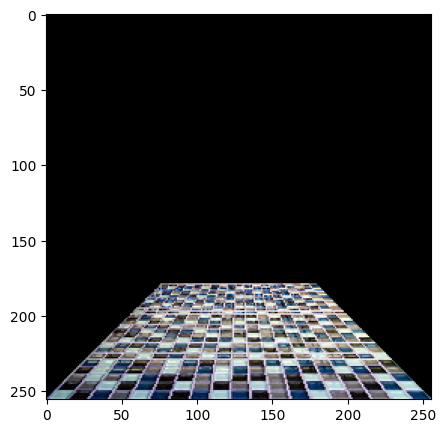

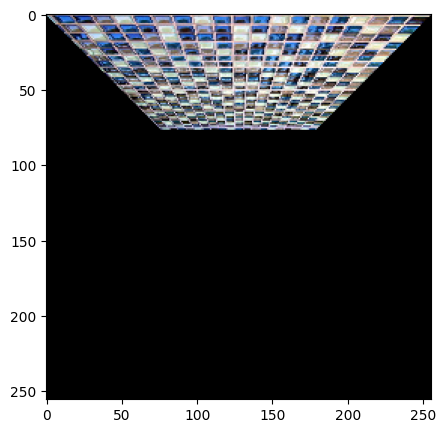

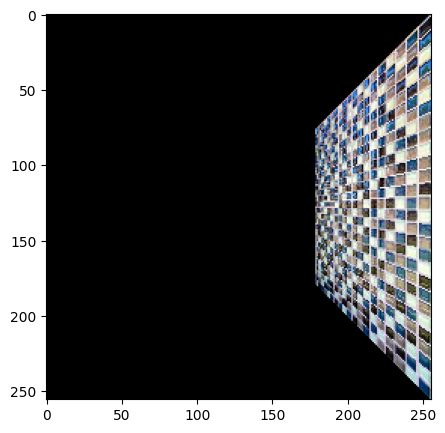

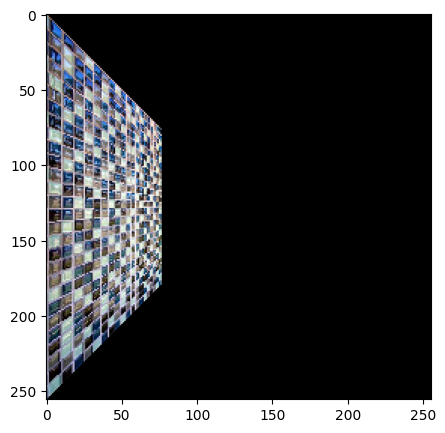

In [125]:
src_points = np.float32([[0,0], [cols-1,0], [0,rows-1], [cols-1,rows-1]])
dst_points_right = np.float32([[int(0.7*cols),int(0.3*rows)], [cols-1,0], [int(0.7*cols),int(0.7*rows)], [cols-1,rows-1]])
dst_points_leaf = np.float32([[0,0], [int(0.3*cols),int(0.3*rows)], [0,rows-1], [int(0.3*cols),int(0.7*rows)]])
dst_points_up = np.float32([[0,0], [cols-1,0], [int(0.3*cols),int(0.3*rows)], [int(0.7*cols),int(0.3*rows)]])
dst_points_down = np.float32([[int(0.3*cols),int(0.7*rows)], [int(0.7*cols),int(0.7*rows)], [0,rows-1], [cols-1,rows-1]])

projective_matrix_right = cv2.getPerspectiveTransform(src_points, dst_points_right)
img_output_right = cv2.warpPerspective(img2, projective_matrix_right, (cols, rows), cv2.INTER_AREA, cv2.BORDER_CONSTANT, 0)

projective_matrix_leaf = cv2.getPerspectiveTransform(src_points, dst_points_leaf)
img_output_leaf = cv2.warpPerspective(img2, projective_matrix_leaf, (cols, rows), cv2.INTER_AREA, cv2.BORDER_CONSTANT, 0)

projective_matrix_up = cv2.getPerspectiveTransform(src_points, dst_points_up)
img_output_up = cv2.warpPerspective(img2, projective_matrix_up, (cols, rows), cv2.INTER_AREA, cv2.BORDER_CONSTANT, 0)


projective_matrix_down = cv2.getPerspectiveTransform(src_points, dst_points_down)
img_output_down = cv2.warpPerspective(img2, projective_matrix_down, (cols, rows), cv2.INTER_AREA, cv2.BORDER_CONSTANT, 0)
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(img_output_down, cv2.COLOR_BGR2RGB))
plt.show()
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(img_output_up, cv2.COLOR_BGR2RGB))
plt.show()
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(img_output_right, cv2.COLOR_BGR2RGB))
plt.show()
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(img_output_leaf, cv2.COLOR_BGR2RGB))
plt.show()

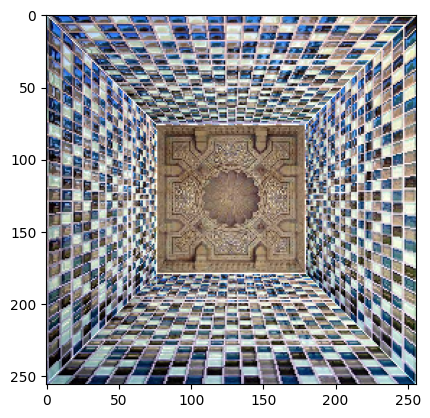

In [127]:
src_celling_points = np.float32([[0,0], [cell_cols-1,0], [0,cell_rows-1], [cell_cols-1,cell_rows-1]])

dst_celling_points = np.float32([[int(0.3*cols),int(0.3*rows)],[int(0.7*cols),int(0.3*rows)],[int(0.3*cols),int(0.7*rows)],[int(0.7*cols),int(0.7*rows)]])

cell_matrix = cv2.getPerspectiveTransform(src_celling_points, dst_celling_points)
combine = cv2.warpPerspective(img1, cell_matrix, (cell_cols, cell_rows), cv2.INTER_AREA, cv2.BORDER_CONSTANT, 0)

result = cv2.add(combine, img_output_right)
result = cv2.add(result, img_output_leaf)
result = cv2.add(result, img_output_up)
result = cv2.add(result, img_output_down)

plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()